# Gravity of an extended body

In this exercise, we are interested in the numerical approximation of the gravity of an extended body. The gravitational potential at a point $P$ external to that body is given by Eq. (3.13),

\begin{equation}
U_g = -G\, \int_x \int_y \int_z \frac{\rho(x,y,z)}{r(x,y,z)}\,dx\,dy\,dz\,,
\end{equation}

where $G$ is the gravitational constant, $\rho(x,y,z)$ is the density at some location $(x,y,z)$, and $r(x,y,z)$ is the distance between $(x,y,z)$ and the observation point $P$.

To numerically solve the integral, we discretize the spatial domain into evenly-spaced grid points $(x_i, y_i, z_i)$, separated by some small distance $h$. We then obtain an approximation of $U_g$ by summing over all grid points,

\begin{equation}
U_g \approx -G\,\sum_i \frac{\rho(x_i,y_i,z_i)}{r(x_i,y_i,z_i)}\,V\,,
\end{equation}

where the small volume $V$ is given by $V=h^3\approx dx\,dy\,dz$. The product $\rho(x_i,y_i,z_i) V$ equals the mass $m_i$ contained in the small volume $V$. Renaming $r_i=r(x_i,y_i,z_i)$, we may rewrite the above equation as

\begin{equation}
U_g \approx -G\,\sum_i \frac{m_i}{r_i}\,,
\end{equation}

which is identical to equation (3.12) in the text.

An approximation that we will make throughout this exercise is that the Earth is contained in a small rectangular box. Though this is obviously not realistic, it greatly simplifies the calculations, while still illustrating the basic principles.

## 0. Import Python packages and define gravitational constant

We start by importing some essential Python packages and defining the gravitational constant.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67508e-11

## 1. Computational domain and density distribution

**As a first step, we set up the computational domain, and we define some density distribution.** For convenience, we limit ourselves to a 2D density distribution, meaning that we ignore the spatial extension of the body in $y$-direction.

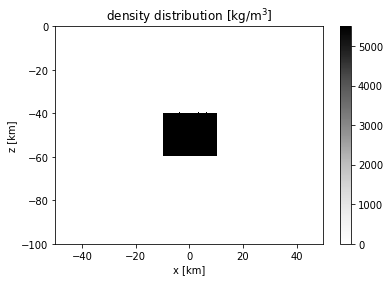

In [20]:
# Dimension of the computational domain [m].
x_min=-50.0e3
x_max=50.0e3
z_min=-100.0e3
z_max=0.0

# Grid spacing [m] and cell volume.
h=1.0e3
V=h**3

nx=np.int((x_max-x_min)/h)
nz=np.int((z_max-z_min)/h)

# Coordinate axes.
x=np.linspace(x_min,x_max,nx)
z=np.linspace(z_min,z_max,nz)

xv,zv=np.meshgrid(x,z,indexing='ij')

# Define some density distribution.
rho=np.zeros(np.shape(xv))
rho[40:60,40:60]=5500.0

# Plot density distribution.
plt.pcolor(xv/1000.0,zv/1000.0,rho,cmap='Greys')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'density distribution [kg$/$m$^3$]')
plt.colorbar()
plt.show()

## 2. Gravitational potential

**Based on the setup above, we can compute the gravitational potential at some observation points.** For this, we initially choose a line of closely spaced points located $10$ m above the surface.

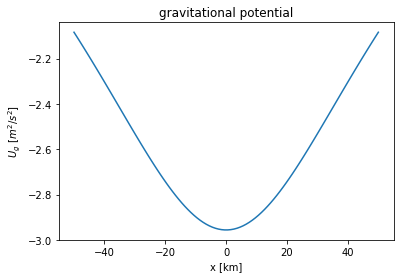

In [23]:
# Define observation points.
x_obs=x
z_obs=10.0*np.ones(nx)

# Initialize gravitational potential.
U=np.zeros(len(x_obs))

# Loop over all observation points.
for k in range(len(x_obs)):
    
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U[k]=-G*V*np.sum(rho/r)
            
# Plot gravitational potential.
plt.plot(x_obs/1000.0,U)
plt.xlabel('x [km]')
plt.ylabel(r'$U_g$ [$m^2$/$s^2$]')
plt.title('gravitational potential')
plt.show()

## 3. Alternative density distribution

**The previous lines of code are very flexible and may be used to study the gravitational potential of other density distributions.** As an example, we consider a denser version of the square from point 2., but with a low-density inclusion.

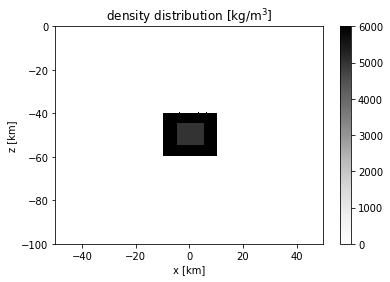

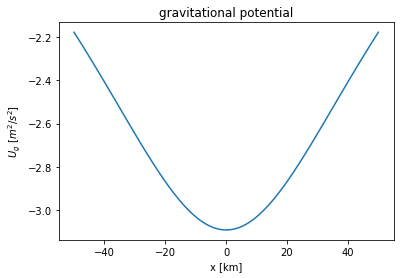

In [24]:
# Define some alternative density distribution.
rho_alt=np.zeros(np.shape(xv))
rho_alt[40:60,40:60]=6000.0
rho_alt[45:55,45:55]=5000.0

# Plot density distribution.
plt.pcolor(xv/1000.0,zv/1000.0,rho_alt,cmap='Greys')
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.title(r'density distribution [kg$/$m$^3$]')
plt.colorbar()
plt.show()

# Initialize gravitational potential.
U_alt=np.zeros(len(x_obs))

# Loop over all observation points.
for k in range(len(x_obs)):
    
    r=np.sqrt((x_obs[k]-xv)**2 + (z_obs[k]-zv)**2)
    U_alt[k]=-G*V*np.sum(rho_alt/r)

# Plot gravitational potential.
plt.plot(x_obs/1000.0,U_alt)
plt.xlabel('x [km]')
plt.ylabel(r'$U_g$ [$m^2$/$s^2$]')
plt.title('gravitational potential')
plt.show()

## 4. Exercises

1) In point 3, modify the density of the inclusion such that the resulting gravity potential resembles the potential from point 2 as closely as possible. For this, plot the difference between the variables *U* and *U_alt*, normalized by the maximum value of *U*. What does your result imply for our ability to distinguish different kinds of density distributions in the Earth?


2) Modify the 2D density distribution in order to model the gravity potential for the following geologic settings: (a) a normal fault, (b) a reverse fault, (c) an anticline, (d) a syncline, and (e) a void inside a homogeneous medium.

3) Compute the gravitational potential on a 2D grid of observation points above the surface ($z>0$) and plot the equipotential surface using the *plt.contour* function.

4) **Optional:** Modify the above computation of the gravitational potential for a 2D body so that a 3D-extended body can be considered. (You may need to be careful not to exceed the storage capacity of your computer.)